In [1]:
import scanpy as sc
import squidpy as sq
from matplotlib import pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import os
from algorithms_torch import *
from data_gen import *
from datasets import *
import time
from scipy import sparse
from scipy.sparse import csr_matrix


In [2]:
def plot_genes(adata,genes_list):
    ncells = adata.X.shape[0]
    spatial_graph = sparse.csr_matrix(create_circular_graph(adata.X.shape[0],0.99))
    for i in genes_list:
        fig, ax = plt.subplots()
        ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')
        ax.plot(range(ncells),savgol_filter(np.array(adata[:,i].X[:,0]),23,3), 'k', linewidth=5.0)
        ax.set_xlabel("Location at matrix " ,  fontsize=16)
        ax.set_ylabel("Gene expression " ,  fontsize=16)
        ax.set_title(i+" expression" ,  fontsize=16)
        plt.tick_params(labelsize=16)
        ax.grid(True)
        plt.show()
        print("Circular mean and variance of " +str(i) +" " + str(circular_mean_var(adata[:,i].X[:,0])))
        try:
            print("Moran's I score of " +str(i) +" " + str(sc.metrics.morans_i(sparse.csr_matrix(spatial_graph ),adata[:,i].X[:,0])))
        except:
            print('Gene was filtered out')
    sc.pp.pca(adata)
    sc.pl.pca(adata,color=genes_list)
    pass

def create_circular_graph(n,alpha):
    A = np.zeros((n,n))
    row = np.zeros(n)
    for k in range(n):
        if k < n / 2:
                row[k] += (alpha ** k) 
        else:
                row[k] += (alpha ** (n-k)) 
    for i in range(n):
        A[i,:]= np.roll(row,i)
    return A

def circular_mean_var(gene):
    gene_len = len(gene)
    theta = (np.array(range(gene_len)) * 2 * np.pi) / gene_len
    return circular_mean(theta,gene/ np.sum(gene))

def circular_mean_var_list(adata, list_of_genes):
        for gene in list_of_genes:
            print("Circular mean and variance of " +str(gene) + " " + str(circular_mean_var(adata[:,gene].X[:,0])))  


In [3]:
def create_circular_graph(n,alpha):
    A = np.zeros((n,n))
    row = np.zeros(n)
    for k in range(n):
        if k < n / 2:
                row[k] += (alpha ** k) 
        else:
                row[k] += (alpha ** (n-k)) 
    for i in range(n):
        A[i,:]= np.roll(row,i)
    return A

In [4]:
adata = sc.read_csv('GSE64016_H1andFUCCI_normalized_EC.csv.gz')
adata=adata.T

In [5]:
adata = adata[:213,:]
marker_genes_list= ['NUSAP1', 'KPNA2', 'CCNB1','TPX2','RPL13','MIF','PFN1','COX5A']


In [6]:
sc.pp.filter_genes(adata, min_counts=1)         # only consider genes with more than 1 count
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)                              
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor='seurat_v3')
for gene in marker_genes_list:
    adata.var.highly_variable[gene]=True
adata = adata[:, adata.var.highly_variable]



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/626889744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var.highly_variable[gene]=True


In [7]:
E , E_recon  = reconstruction_cyclic(adata.X , verbose=False)

In [8]:
sga_range= e_to_range(E_recon)
adata = adata[sga_range,:]
#print("Projection prop " +str(projection_prop(adata.X)))

In [9]:
adata_sorted= adata.copy()

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


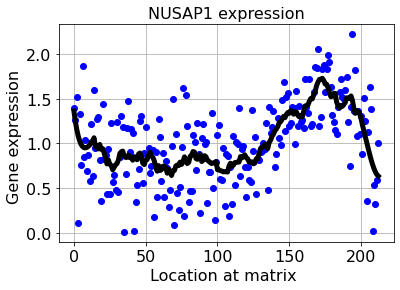

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of NUSAP1 (-1.0917640255358783, 0.8259234757127405)
Moran's I score of NUSAP1 0.06642882954824446


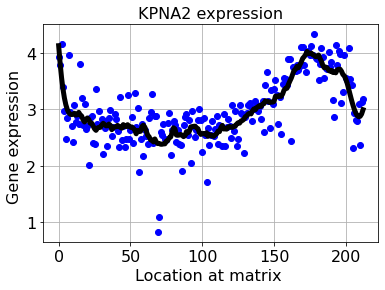

Circular mean and variance of KPNA2 (-0.9490273285584769, 0.9009978899950348)
Moran's I score of KPNA2 0.11127874840046778


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


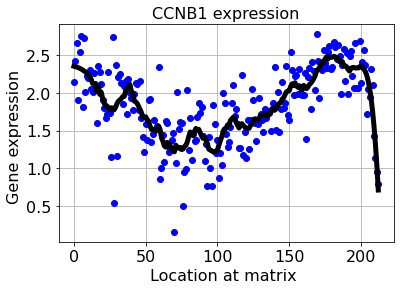

Circular mean and variance of CCNB1 (-0.6403784295128426, 0.87211344413222)
Moran's I score of CCNB1 0.09483856472959545


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


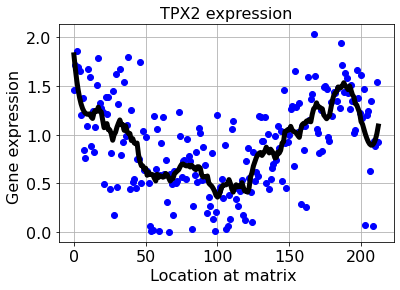

Circular mean and variance of TPX2 (-0.4395720776072382, 0.7680676498040983)
Moran's I score of TPX2 0.0840301483037394


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


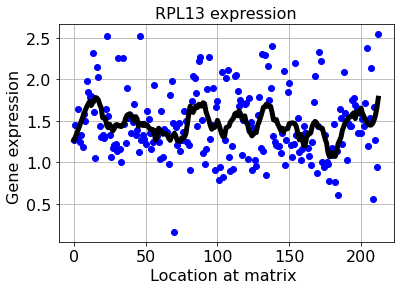

Circular mean and variance of RPL13 (1.2516357067965378, 0.9891226776294676)
Moran's I score of RPL13 0.002032198856954765


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


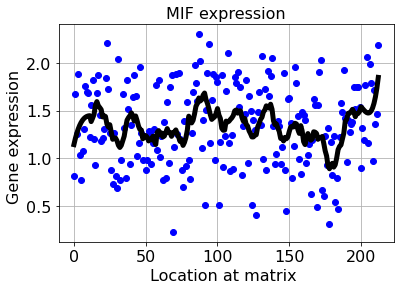

Circular mean and variance of MIF (2.166220727512054, 0.9885223935794786)
Moran's I score of MIF 0.002392916541886007


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


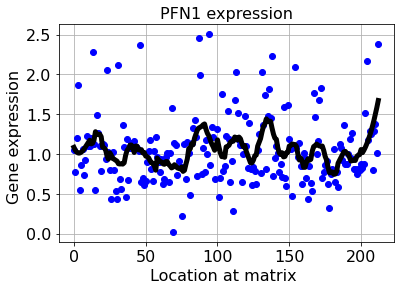

Circular mean and variance of PFN1 (-2.3038011845576487, 0.9834317792387434)
Moran's I score of PFN1 0.0024820828914534823


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


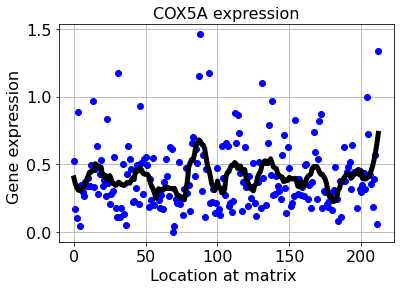

Circular mean and variance of COX5A (-2.464705474512986, 0.9808097836700201)
Moran's I score of COX5A 0.0014557698982909245


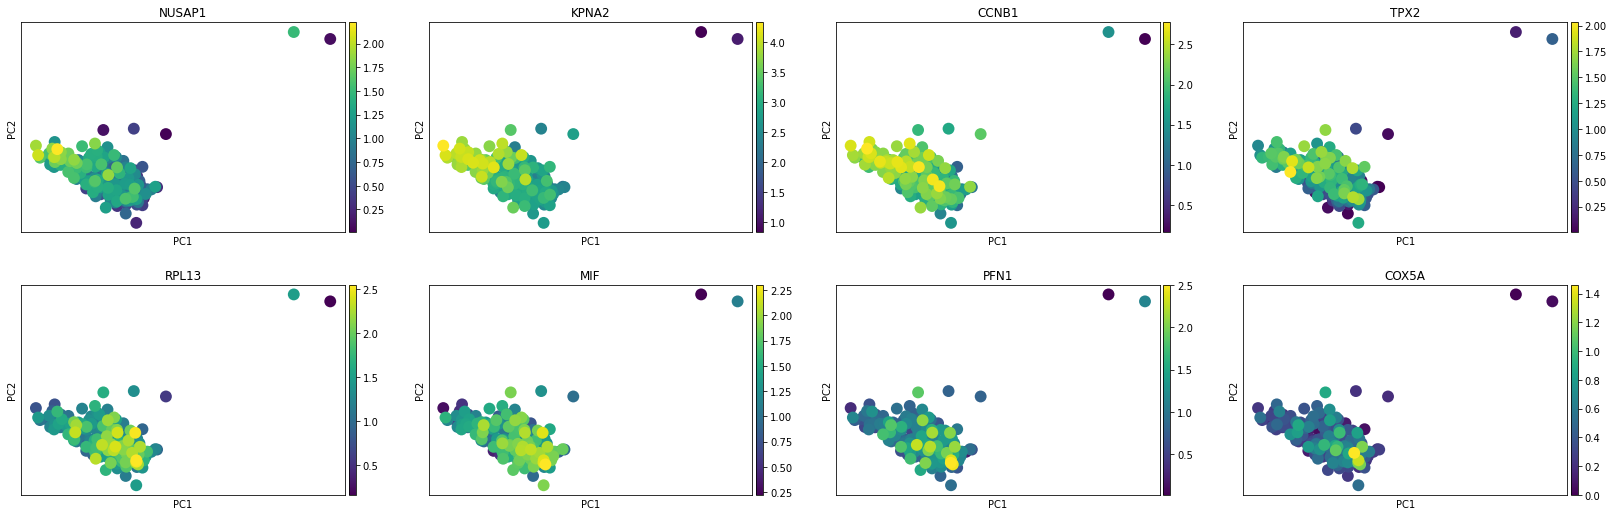

In [10]:
plot_genes(adata,marker_genes_list)#, title='Reconstructed cell cycle')
#auc_array= np.zeros(100)
#for i in range(100):
#    auc_array[i] = cc_gene_inference(adata,10)
#print("Mean AUC-ROC: " + str(np.mean(auc_array)))

#cc_gene_inference(adata,10)
#circular_mean_var_list(adata,marker_genes_list)

In [11]:
D  = filter_non_cyclic_genes(adata.X.astype('float64'), iterNum=500, regu=1e-1)

Iteration number: 
1
function value= 
140.09147907939914
Iteration number: 
26
function value= 
379.3785484749583
Iteration number: 
51
function value= 
415.4693435498016
Iteration number: 
76
function value= 
424.80612637239847
Iteration number: 
101
function value= 
429.25601722535725
Iteration number: 
126
function value= 
431.9605333792634
Iteration number: 
151
function value= 
433.5271131274746
Iteration number: 
176
function value= 
434.55741953241835
Iteration number: 
201
function value= 
435.18888108545417
Iteration number: 
226
function value= 
435.65359555708477
Iteration number: 
251
function value= 
436.0024241873449
Iteration number: 
276
function value= 
436.3386745683079
Iteration number: 
301
function value= 
436.5716404816815
Iteration number: 
326
function value= 
436.7521286668677
Iteration number: 
351
function value= 
436.92847146294866
Iteration number: 
376
function value= 
437.06017701828245
Iteration number: 
401
function value= 
437.1823495847347
Iteration n

In [12]:
adata.X = adata.X @ D

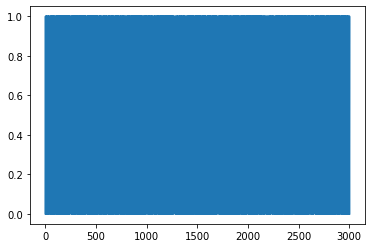

In [13]:
plt.plot(D.diagonal())

In [14]:
F = enhancement_cyclic(adata.X.astype('float64'),regu=1e-4)
adata.X = adata.X * F

Iteration number: 
1
function value: 
110.80476531253699
Iteration number: 
26
function value: 
196.96021534966965
Iteration number: 
51
function value: 
296.864793828212
Iteration number: 
76
function value: 
390.41626951580804
Iteration number: 
101
function value: 
461.5462774230074
Iteration number: 
126
function value: 
514.3702590284449
Iteration number: 
151
function value: 
553.0919824856413
Iteration number: 
176
function value: 
582.0130960433005
Iteration number: 
201
function value: 
604.4169692929656
Iteration number: 
226
function value: 
621.6490863376018
Iteration number: 
251
function value: 
635.2389446066567
Iteration number: 
276
function value: 
646.0382336928169


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


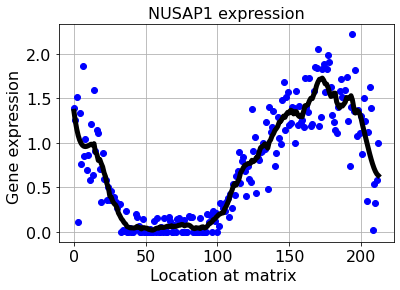

Circular mean and variance of NUSAP1 (-1.145661045127391, 0.45850939707817895)
Moran's I score of NUSAP1 0.17216699342897182


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


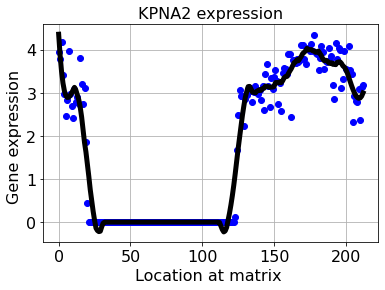

Circular mean and variance of KPNA2 (-1.0158656324431241, 0.34391176502290455)
Moran's I score of KPNA2 0.18419806083467025


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


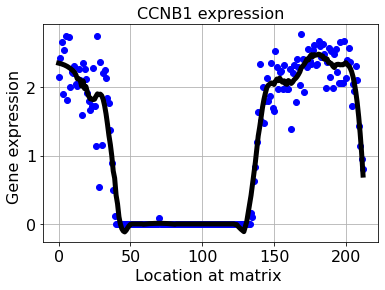

Circular mean and variance of CCNB1 (-0.6067947359790469, 0.37947888806753527)
Moran's I score of CCNB1 0.17669355359842284


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


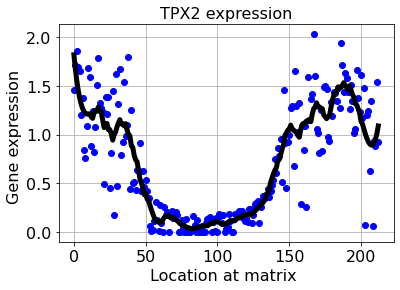

Circular mean and variance of TPX2 (-0.4413861165172963, 0.5109147270638651)
Moran's I score of TPX2 0.15256351226907988


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


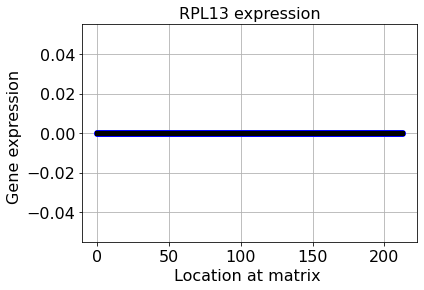

Circular mean and variance of RPL13 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


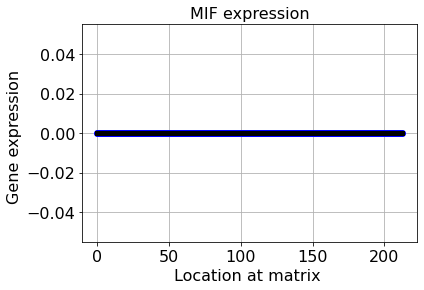

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of MIF (nan, nan)
Gene was filtered out


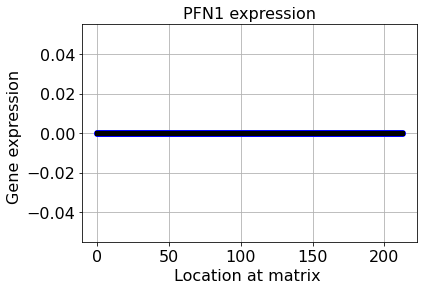

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of PFN1 (nan, nan)
Gene was filtered out


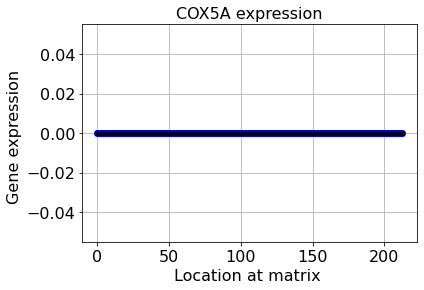

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of COX5A (nan, nan)
Gene was filtered out


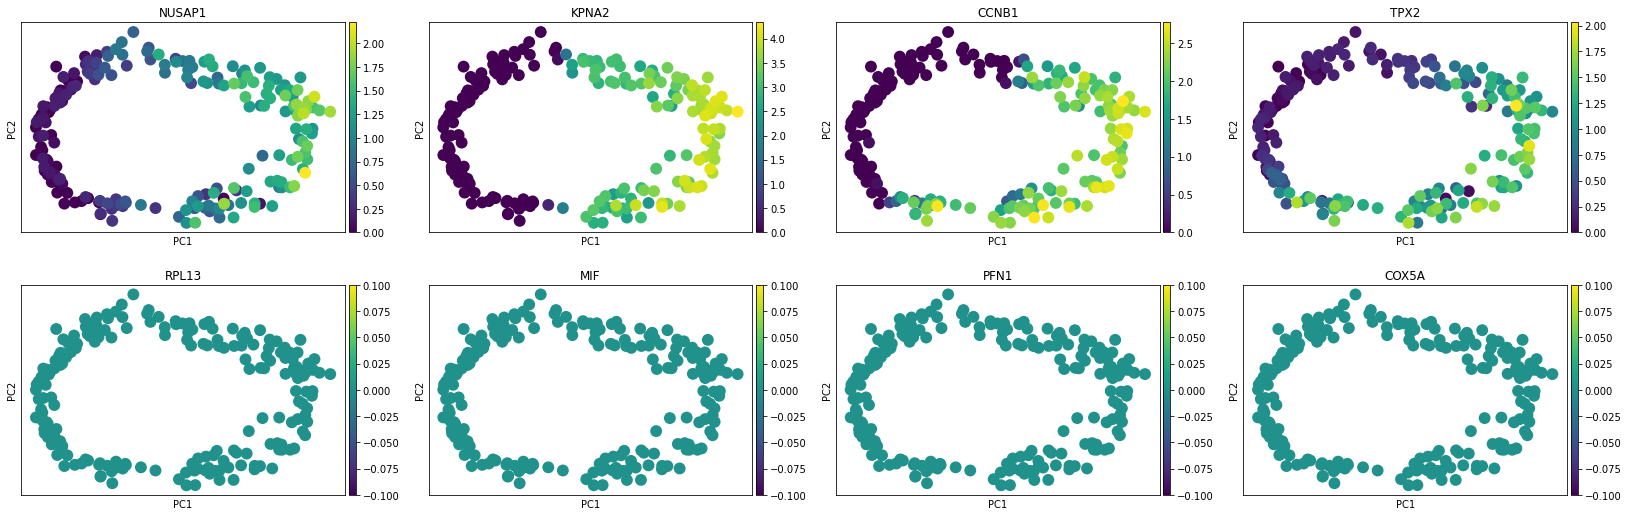

In [15]:
plot_genes(adata,marker_genes_list)#, title='Enhanced cell cycle')
#auc_array= np.zeros(100)
#for i in range(100):
#    auc_array[i] = cc_gene_inference(adata,10)
#print("Mean AUC-ROC: " + str(np.mean(auc_array)))

#cc_gene_inference(adata,10)
#circular_mean_var_list(adata,marker_genes_list)

In [16]:
adata_filtered= adata_sorted.copy()
F = filtering_cyclic(adata_sorted.X.astype('float64'), regu=0 , iterNum=500)

starting filtering
25
th Iteration    Loss :: 
9.627993912988956
50
th Iteration    Loss :: 
6.191459976946062
75
th Iteration    Loss :: 
4.824100840617324
100
th Iteration    Loss :: 
4.079102807850481
125
th Iteration    Loss :: 
3.5955561773924822
150
th Iteration    Loss :: 
3.247996386966905
175
th Iteration    Loss :: 
2.981435150843615
200
th Iteration    Loss :: 
2.767588679441074
225
th Iteration    Loss :: 
2.5906659039137248
250
th Iteration    Loss :: 
2.4408917008945292
275
th Iteration    Loss :: 
2.311846693479697
300
th Iteration    Loss :: 
2.199093007360835
325
th Iteration    Loss :: 
2.0993577357893787
350
th Iteration    Loss :: 
2.0102861901546407
375
th Iteration    Loss :: 
1.9301169677550434
400
th Iteration    Loss :: 
1.8574878382488427
425
th Iteration    Loss :: 
1.7912696555640482
450
th Iteration    Loss :: 
1.730576472187709
475
th Iteration    Loss :: 
1.6747563169452104
500
th Iteration    Loss :: 
1.6231846929940068


In [17]:
adata_filtered.X = adata_filtered.X * F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


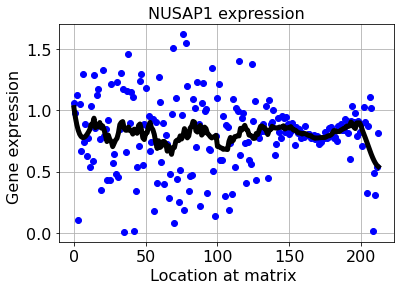

Circular mean and variance of NUSAP1 (-1.003727073313542, 0.9894006917840804)
Moran's I score of NUSAP1 0.0007111795610082828


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


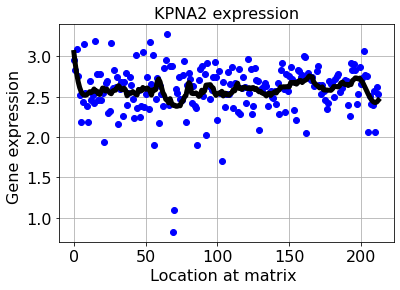

Circular mean and variance of KPNA2 (-1.0466193057432491, 0.9890668731386167)
Moran's I score of KPNA2 0.004123042671746435


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


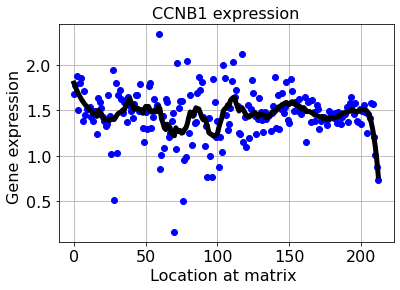

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of CCNB1 (-1.0439546842978682, 0.9881415026942002)
Moran's I score of CCNB1 0.002735142909950318


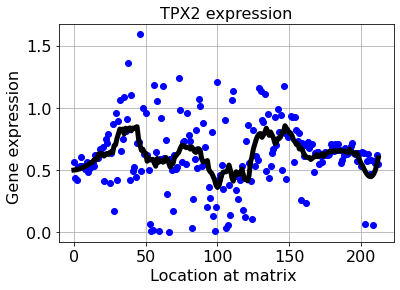

Circular mean and variance of TPX2 (-0.9042182370314403, 0.9866033149030456)
Moran's I score of TPX2 0.0033589935358358386


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


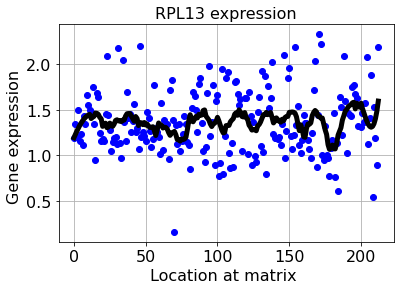

Circular mean and variance of RPL13 (-0.926820451460981, 0.9907300677514486)


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Moran's I score of RPL13 0.0011495084290955404


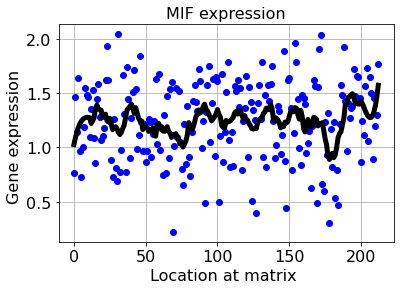

Circular mean and variance of MIF (-0.9000047047754668, 0.991119418149991)
Moran's I score of MIF 0.0012581226819669685


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


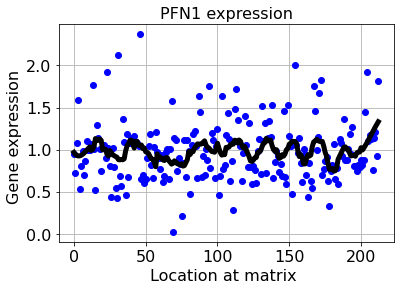

Circular mean and variance of PFN1 (-1.014604683895142, 0.9905287310018845)
Moran's I score of PFN1 0.0010434753161794991


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


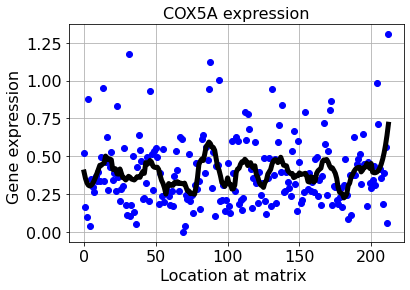

Circular mean and variance of COX5A (-1.0057070936409145, 0.9887572883323433)
Moran's I score of COX5A 0.0010099828111510283


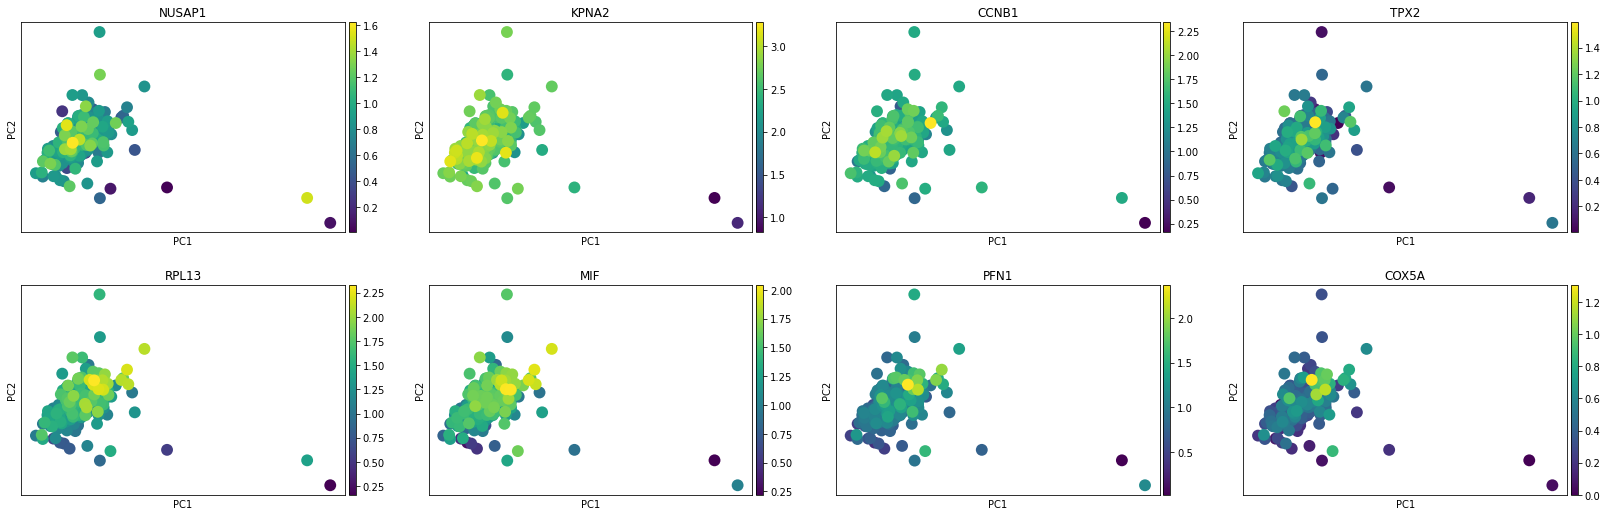

In [18]:
plot_genes(adata_filtered,marker_genes_list)#,  title='Reconstructed ordering oscillator')


In [19]:
adata_second_signal = adata_filtered.copy()

In [20]:
E , E_recon  = reconstruction_cyclic(adata_second_signal.X , verbose=False)

In [21]:
sga_range= e_to_range(E_recon)
adata_second_signal = adata_second_signal[sga_range,:]
#print("Projection prop " +str(projection_prop(adata.X)))

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


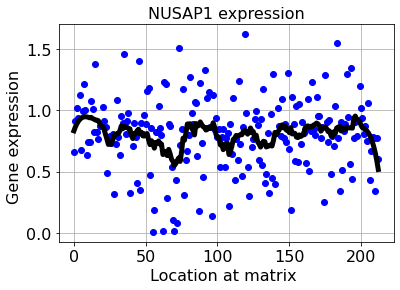

Circular mean and variance of NUSAP1 (-0.5969510814715657, 0.9687310298821328)
Moran's I score of NUSAP1 0.0036751703241211116


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


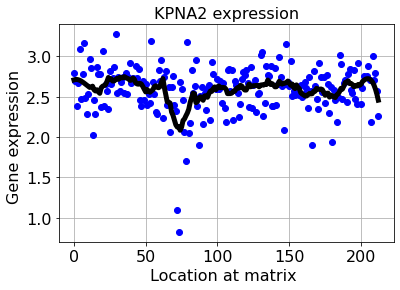

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of KPNA2 (-0.48611877367673834, 0.9866637060849268)
Moran's I score of KPNA2 0.00794791602235861


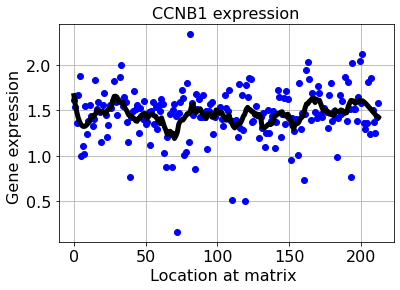

Circular mean and variance of CCNB1 (-0.44531762273808384, 0.9798523283380408)
Moran's I score of CCNB1 0.005656616797905342


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


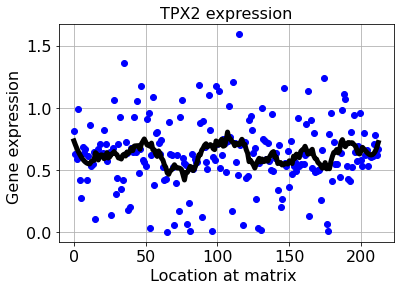

Circular mean and variance of TPX2 (-0.27030992280209554, 0.9948874219142357)
Moran's I score of TPX2 0.0011529527016638326


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


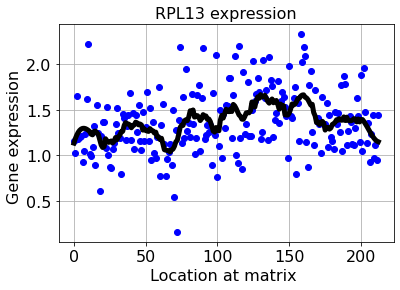

Circular mean and variance of RPL13 (-2.1645467227029256, 0.9363567142969722)
Moran's I score of RPL13 0.02624504991792533


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


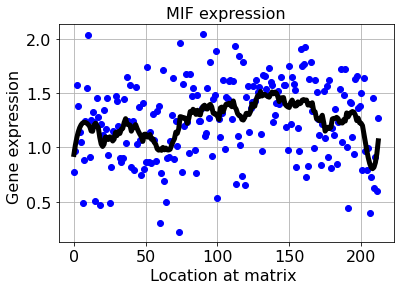

Circular mean and variance of MIF (-2.326592610602794, 0.9298375320712526)
Moran's I score of MIF 0.024371851099835796


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


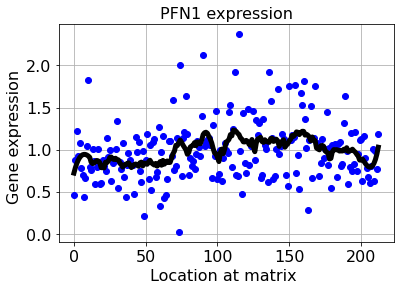

Circular mean and variance of PFN1 (-2.3762119299050513, 0.9217367269245884)
Moran's I score of PFN1 0.020444906166726038


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


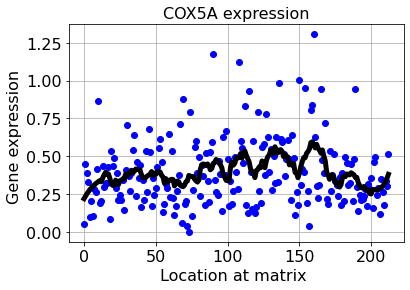

Circular mean and variance of COX5A (-2.559086145641793, 0.8995150204336982)
Moran's I score of COX5A 0.014003581408706845


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


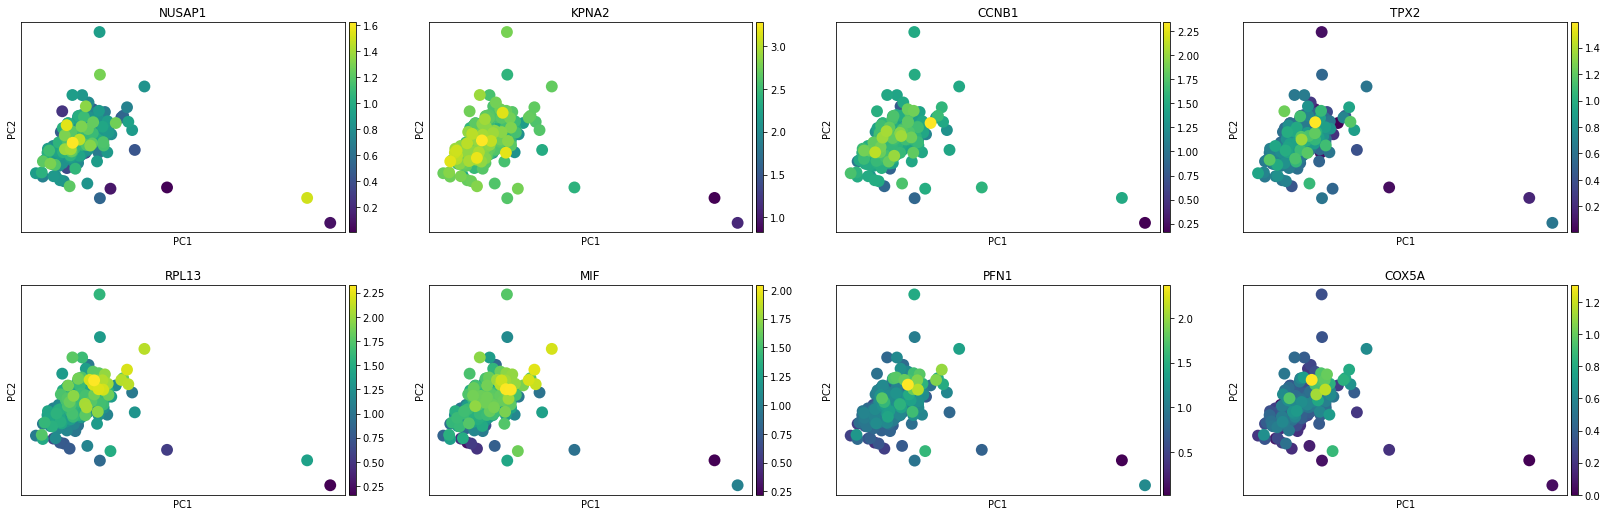

In [22]:
plot_genes(adata_second_signal,marker_genes_list)#,  title='Reconstructed ordering oscillator')
#auc_array= np.zeros(100)
#for i in range(100):
#    auc_array[i] = cc_gene_inference(adata_second_signal,10)
#print("Mean AUC-ROC: " + str(np.mean(auc_array)))

#cc_gene_inference(adata_second_signal,10)
#circular_mean_var_list(adata_second_signal,marker_genes_list)

In [23]:
D  = filter_non_cyclic_genes(adata_second_signal.X.astype('float64'), iterNum=500, regu=5e-2)

Iteration number: 
1
function value= 
102.88838565298059
Iteration number: 
26
function value= 
293.2778767651035
Iteration number: 
51
function value= 
334.160140677195
Iteration number: 
76
function value= 
346.9935423395652
Iteration number: 
101
function value= 
353.1222000912272
Iteration number: 
126
function value= 
356.3602514940389
Iteration number: 
151
function value= 
358.3523419225808
Iteration number: 
176
function value= 
359.6635486920677
Iteration number: 
201
function value= 
360.6124051131779
Iteration number: 
226
function value= 
361.30288477951075
Iteration number: 
251
function value= 
361.83134145785465
Iteration number: 
276
function value= 
362.2412040673742
Iteration number: 
301
function value= 
362.5922092886051
Iteration number: 
326
function value= 
362.8899891605547
Iteration number: 
351
function value= 
363.14341900036385
Iteration number: 
376
function value= 
363.3595003268691
Iteration number: 
401
function value= 
363.52610060260025
Iteration numbe

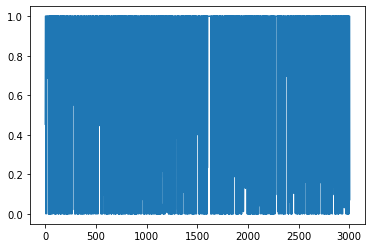

In [24]:
plt.plot(D.diagonal())

In [25]:
adata_second_signal.X = adata_second_signal.X @ D

In [26]:
F = enhancement_cyclic(adata_second_signal.X.astype('float64'),regu=1e-4)


Iteration number: 
1
function value: 
51.56549384070719
Iteration number: 
26
function value: 
79.22192789076064
Iteration number: 
51
function value: 
148.06336129537604
Iteration number: 
76
function value: 
203.34805343933309
Iteration number: 
101
function value: 
246.2147677306408
Iteration number: 
126
function value: 
280.0061193348408
Iteration number: 
151
function value: 
308.92537401817816
Iteration number: 
176
function value: 
333.5550096015012
Iteration number: 
201
function value: 
354.3407843297113
Iteration number: 
226
function value: 
371.7882122290917
Iteration number: 
251
function value: 
386.4143271696699
Iteration number: 
276
function value: 
398.6648869256368


In [27]:
adata_second_signal.X = adata_second_signal.X * F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


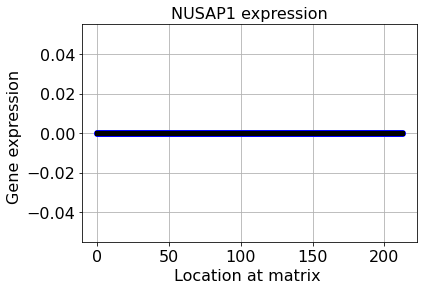

Circular mean and variance of NUSAP1 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


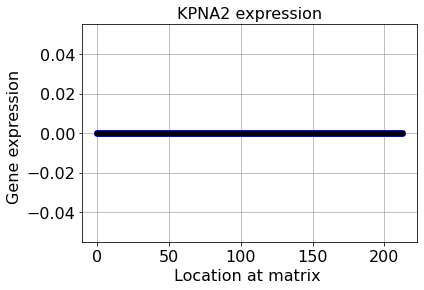

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of KPNA2 (nan, nan)
Gene was filtered out


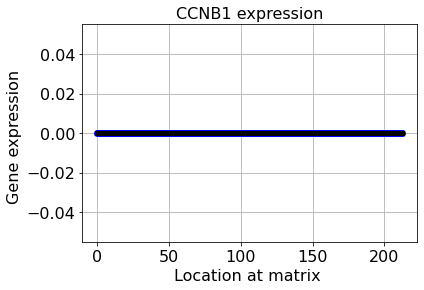

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of CCNB1 (nan, nan)
Gene was filtered out


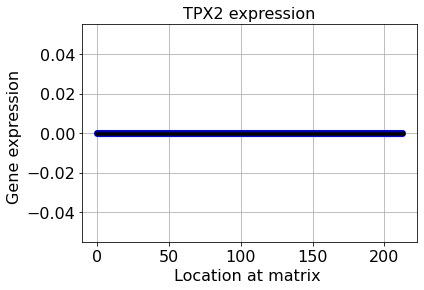

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:38: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of TPX2 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


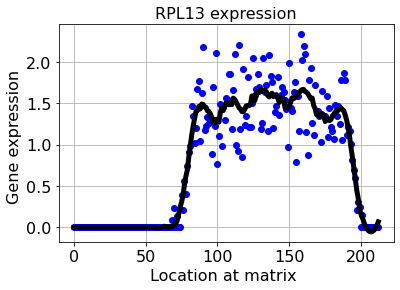

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of RPL13 (-2.244669286632817, 0.4122868665442496)
Moran's I score of RPL13 0.16992008900808664


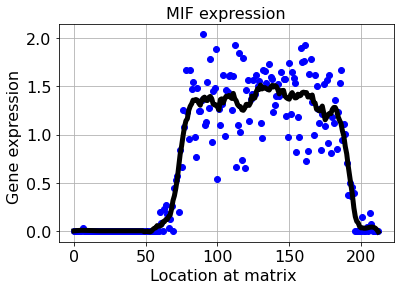

Circular mean and variance of MIF (-2.400739922386868, 0.43352030080591386)
Moran's I score of MIF 0.1681020294526405


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


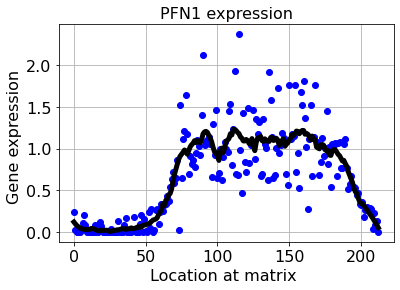

Circular mean and variance of PFN1 (-2.4134187950355246, 0.5344782071834682)
Moran's I score of PFN1 0.14225521532781008


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


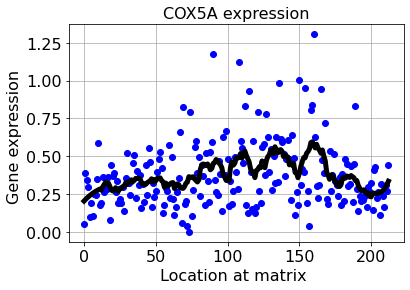

Circular mean and variance of COX5A (-2.5327577728315753, 0.8591019107344678)
Moran's I score of COX5A 0.02550167988732062


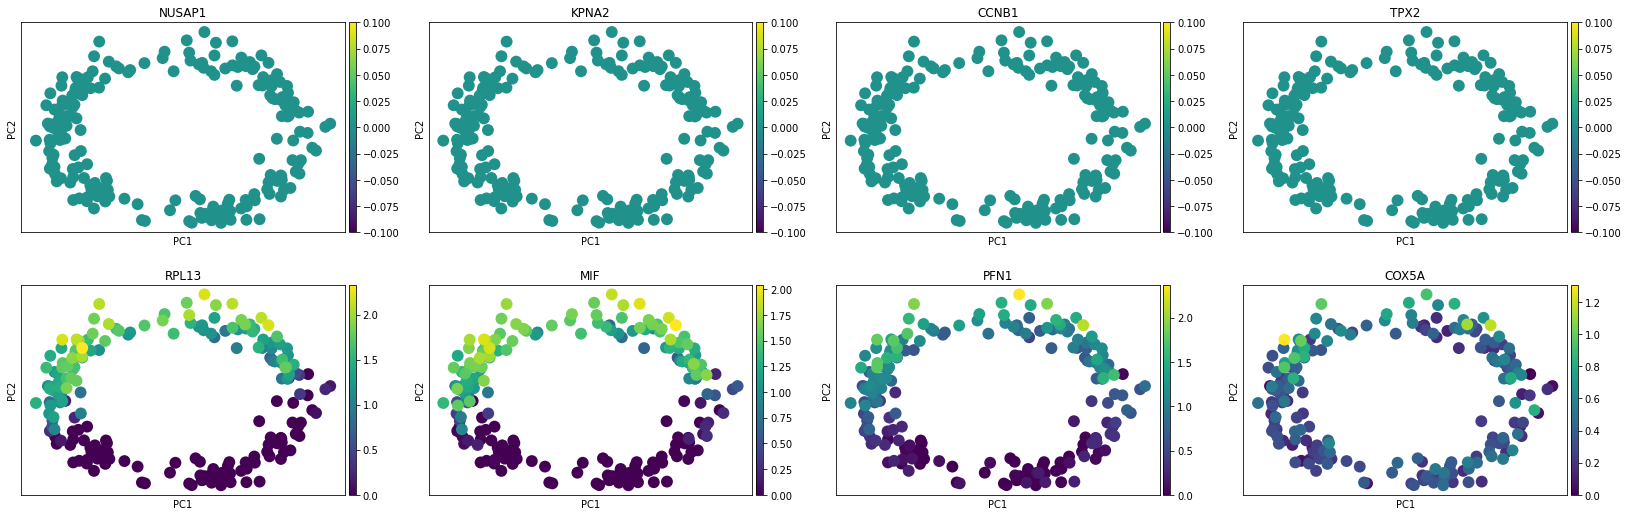

In [28]:
plot_genes(adata_second_signal,marker_genes_list)#,   title='Enhanced ordering oscillator')
#auc_array= np.zeros(100)
#for i in range(100):
#    auc_array[i] = cc_gene_inference(adata_second_signal,10)
#print("Mean AUC-ROC: " + str(np.mean(auc_array)))
#circular_mean_var_list(adata_second_signal,marker_genes_list)

In [29]:
adata_filtered_second_signal = adata_filtered.copy()

In [30]:
adata_filtered_second_signal = adata_filtered_second_signal[sga_range,:]


In [31]:
F = filtering_cyclic(adata_filtered_second_signal.X.astype('float64'), regu=0 , iterNum=500)

starting filtering
25
th Iteration    Loss :: 
5.828233753166554
50
th Iteration    Loss :: 
4.407962080487204
75
th Iteration    Loss :: 
3.6854478981301764
100
th Iteration    Loss :: 
3.2330560485466147
125
th Iteration    Loss :: 
2.914922739021744
150
th Iteration    Loss :: 
2.67461784912438
175
th Iteration    Loss :: 
2.4843876523817703
200
th Iteration    Loss :: 
2.32839736273273
225
th Iteration    Loss :: 
2.1973333199408014
250
th Iteration    Loss :: 
2.0849165357454162
275
th Iteration    Loss :: 
1.9870072737298623
300
th Iteration    Loss :: 
1.9006830202346376
325
th Iteration    Loss :: 
1.8237872891644495
350
th Iteration    Loss :: 
1.754686037100639
375
th Iteration    Loss :: 
1.6921215067020978
400
th Iteration    Loss :: 
1.6351056573245448
425
th Iteration    Loss :: 
1.5828688052102544
450
th Iteration    Loss :: 
1.5348081565226668
475
th Iteration    Loss :: 
1.4903482883084618
500
th Iteration    Loss :: 
1.4490674595469137


In [32]:
adata_filtered_second_signal.X = adata_filtered_second_signal.X *F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


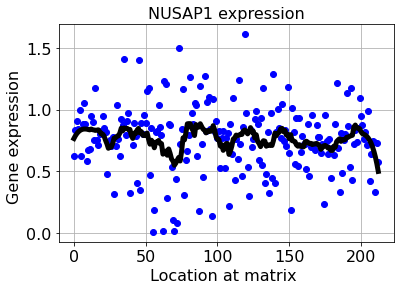

Circular mean and variance of NUSAP1 (1.221420419568921, 0.9939923765444185)
Moran's I score of NUSAP1 0.0006983257631925481


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


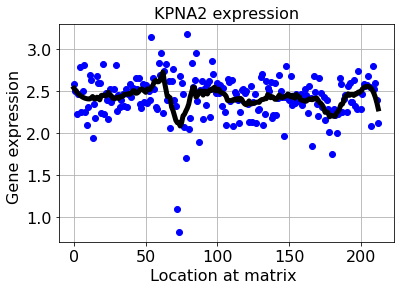

Circular mean and variance of KPNA2 (1.353661681876864, 0.9917584003220696)
Moran's I score of KPNA2 0.0032118693343028064


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


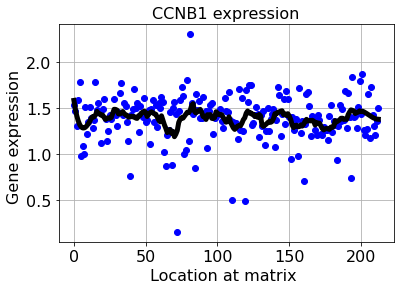

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of CCNB1 (1.2206753081535973, 0.9921255614039165)
Moran's I score of CCNB1 0.0013234456778663042


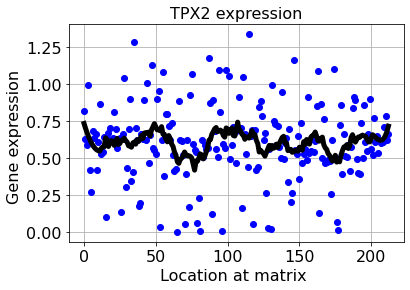

Circular mean and variance of TPX2 (1.0096000955211057, 0.9912867691988689)
Moran's I score of TPX2 0.0009157223737307292


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


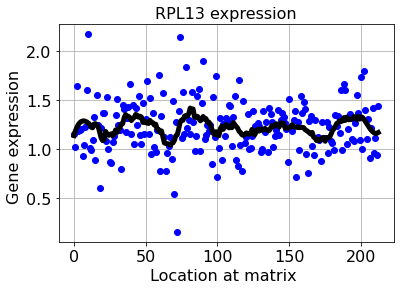

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of RPL13 (1.25166759347944, 0.9919365935516017)
Moran's I score of RPL13 0.0011536350840229666


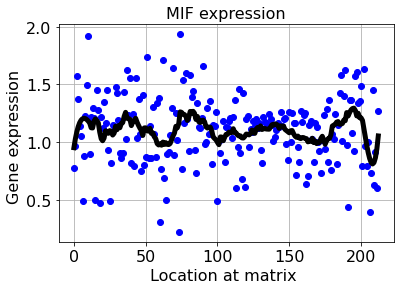

Circular mean and variance of MIF (1.303668831953826, 0.9920106832357195)
Moran's I score of MIF 0.0009098416519715706


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


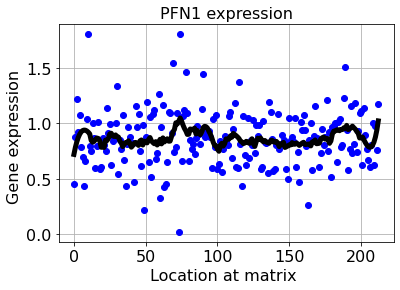

Circular mean and variance of PFN1 (1.2843352859520223, 0.9924624600490768)
Moran's I score of PFN1 0.0010244821113856793


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_13481/1339478038.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


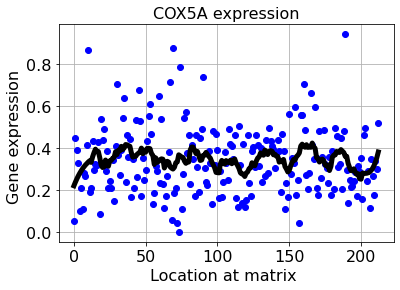

Circular mean and variance of COX5A (2.213445987155538, 0.9898635707341864)
Moran's I score of COX5A 0.001079441147992565


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


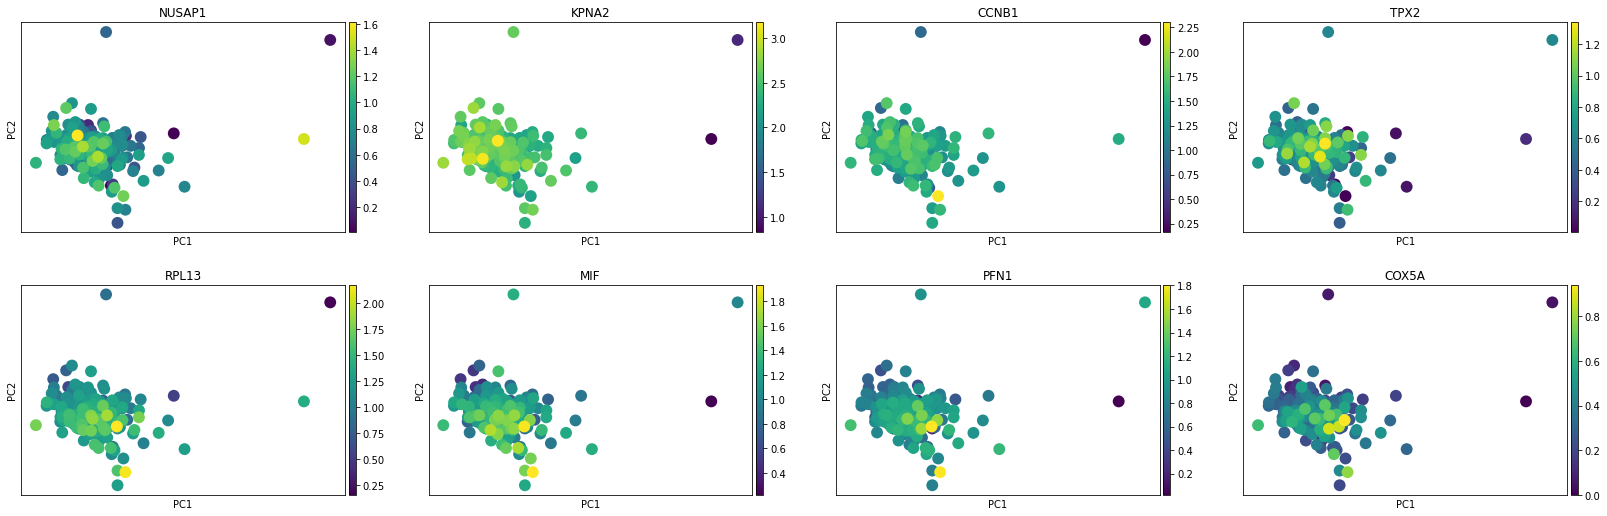

In [33]:
plot_genes(adata_filtered_second_signal,marker_genes_list)#,   title='Enhanced ordering oscillator')
